In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import collections
import csv
import seaborn as sns
%matplotlib inline  

In [2]:
buildings = pd.read_csv('/Users/W/Downloads/building_inventory.csv',
                        na_values = {'Square Footage': 0,'Year Acquired': 0,'Year Constructed': 0, 'Total Floors':0})
# if any of these columns have a value 0, treat as a NaN or not-a-number
buildings.shape  # (8862, 22)

(8862, 22)

In [3]:
# drop duplicate rows 
buildings = buildings.drop_duplicates()
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1.0,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1.0,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000.0,2000.0,120.0,1.0,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000.0,2000.0,144.0,1.0,1,0,Unusual,Unusual,Not provided
12,Department of Natural Resources,Eldon Hazlet State Park - Clinton County,Keyesport Road,Carlyle,62231,Clinton,15,John Shimkus,107,Cavaletto John,...,In Use,1999.0,1999.0,96.0,1.0,1,0,Storage,Storage,Not provided
13,Department of Natural Resources,Weinberg-King State Park - Schuyler County,P.o. Box 203,Augusta,62311,Schuyler,18,Darin M. LaHood,93,Hammond Norine K.,...,In Use,1980.0,1980.0,625.0,1.0,1,0,Assembly,Assembly,Not provided
14,Department of Natural Resources,Weinberg-King State Park - Schuyler County,P.o. Box 203,Augusta,62311,Schuyler,18,Darin M. LaHood,93,Hammond Norine K.,...,In Use,2000.0,2000.0,144.0,1.0,1,0,Unusual,Unusual,Not provided
16,Department of Natural Resources,Weinberg-King State Park - Schuyler County,P.o. Box 203,Augusta,62311,Schuyler,18,Darin M. LaHood,93,Hammond Norine K.,...,In Use,1997.0,1997.0,740.0,1.0,1,0,Assembly,Assembly,Not provided
17,Department of Natural Resources,Weinberg-King State Park - Schuyler County,P.o. Box 203,Augusta,62311,Schuyler,18,Darin M. LaHood,93,Hammond Norine K.,...,In Use,2000.0,2000.0,320.0,1.0,1,0,Assembly,Assembly,Not provided
19,Department of Natural Resources,Weinberg-King State Park - Schuyler County,P.o. Box 203,Augusta,62311,Schuyler,18,Darin M. LaHood,93,Hammond Norine K.,...,In Use,1976.0,1976.0,625.0,1.0,1,0,Assembly,Assembly,Not provided


In [4]:
buildings.shape    # (6937,22)  duplicate rows have been removeed

(6937, 22)

## Q1  Relationship between the year acquired and the year constructed

In [5]:
# filter rows with both acquired year and constructed year
buildings_filtered = buildings[(buildings['Year Acquired'].isna()==False) & (buildings['Year Constructed'].isna()==False)]
# sort the dataset based on the year acquired
buildings_sorted = buildings_filtered.sort_values(by=['Year Acquired'])

In [6]:
year_acquired = np.array(buildings_sorted['Year Acquired'])   
year_constructed = np.array(buildings_sorted['Year Constructed'])

In [7]:
# add a new column as the difference of the constructed year and acquired year
buildings_sorted = buildings_sorted.assign(Year_Difference=lambda x: x['Year Acquired']-x['Year Constructed'])

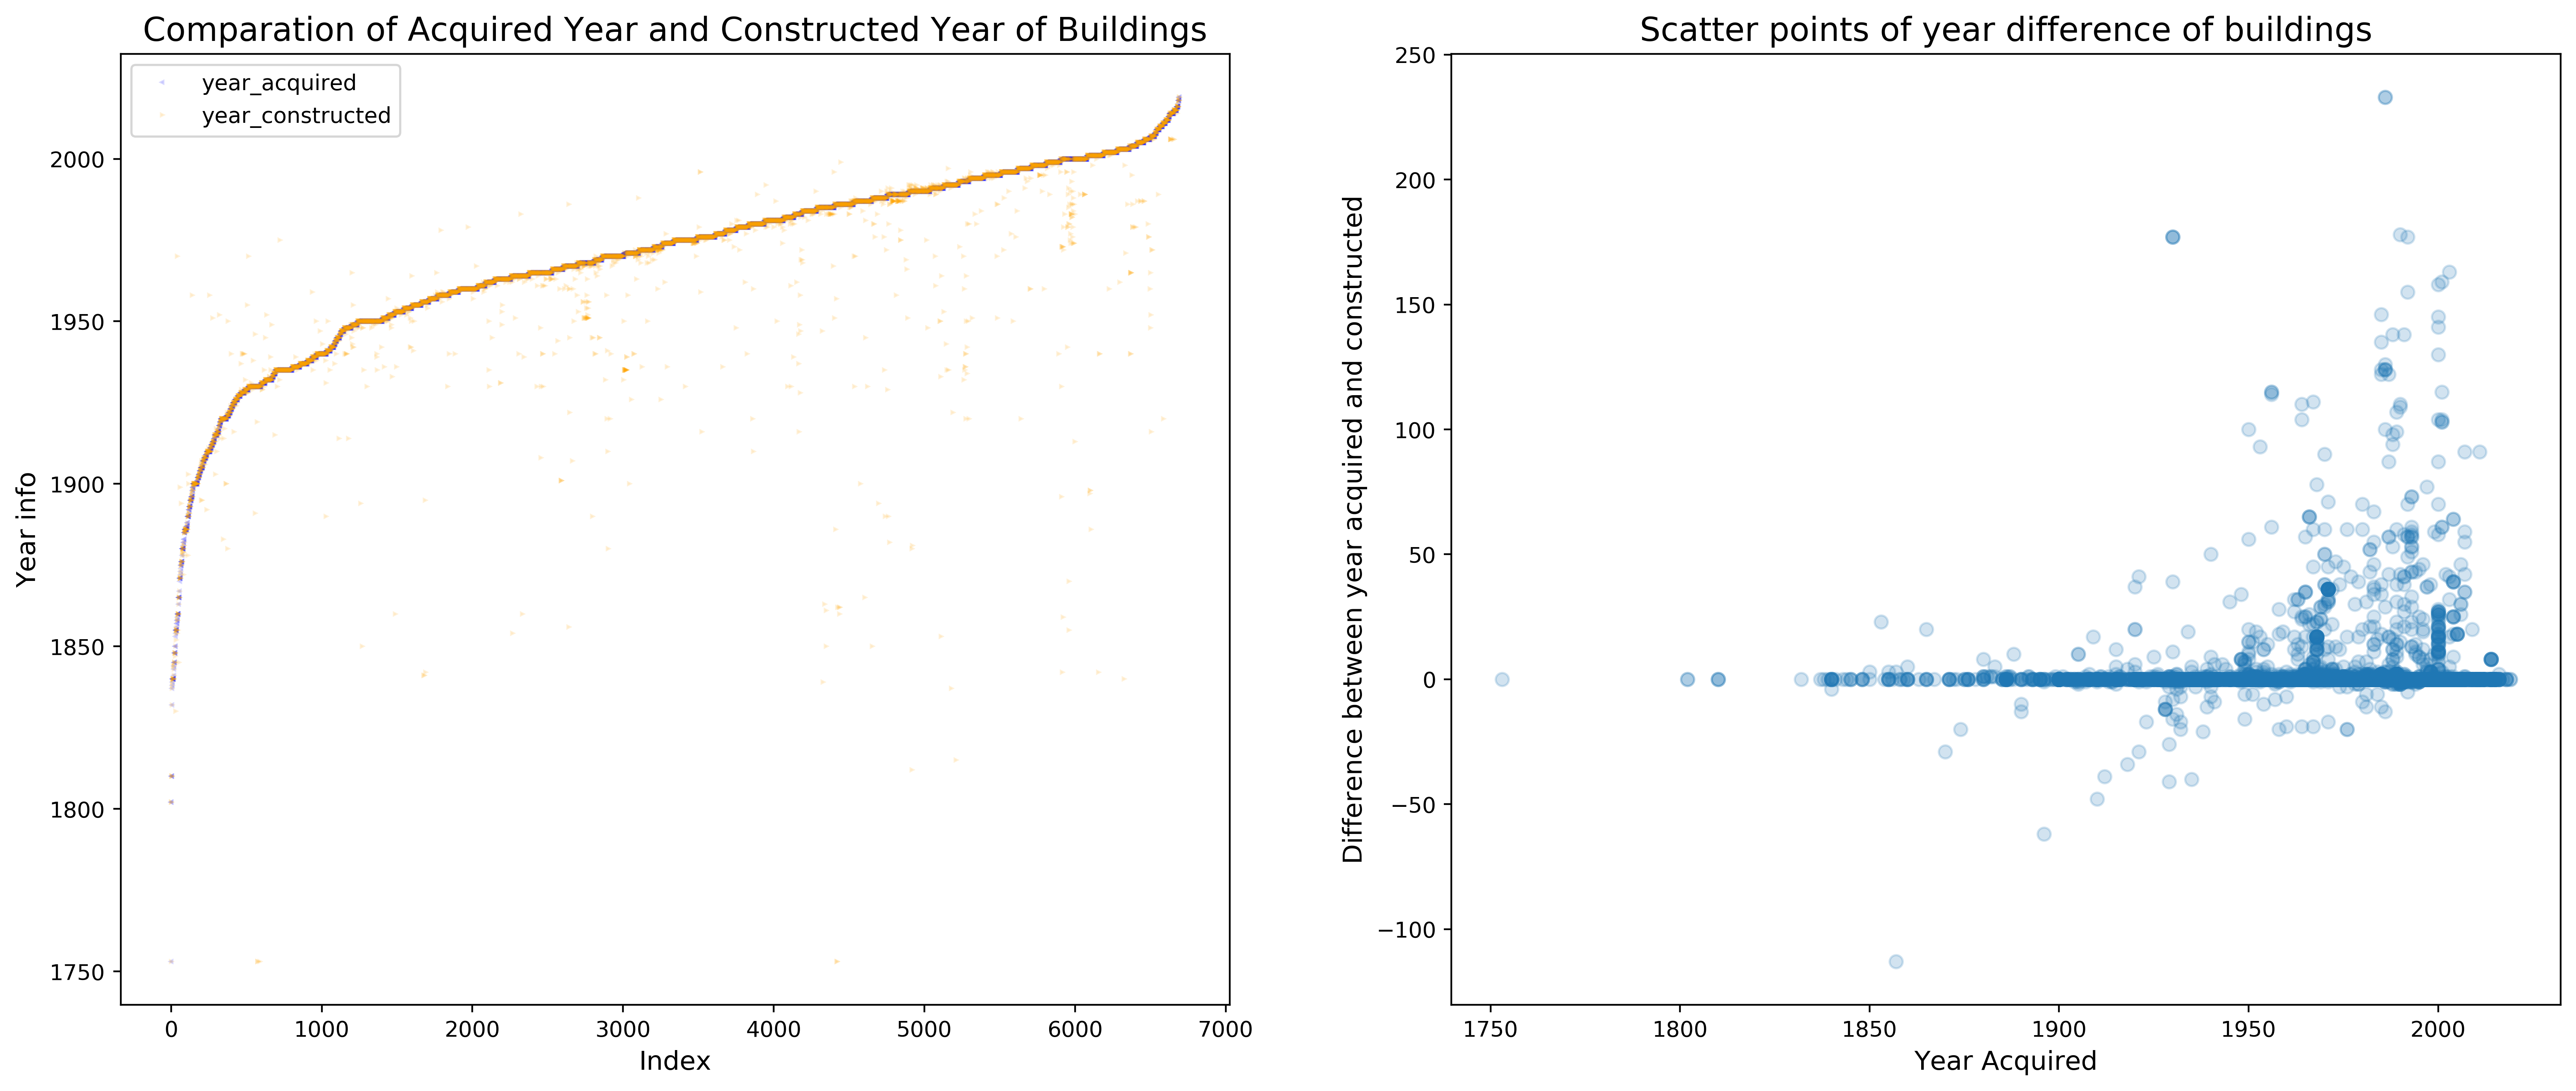

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20,8), dpi=400)

# the first figure
ax[0].plot(year_acquired, marker='<', markersize=1.0, lw=0, C='blue', label='A', alpha=0.15)  # alpha indicates the transparency
ax[0].plot(year_constructed, marker='>', markersize=1.0, lw=0, C='orange', label='C', alpha=0.15)
ax[0].set_xlabel('Index',fontsize=12)
ax[0].set_ylabel('Year info',fontsize=12)
ax[0].set_title('Comparation of Acquired Year and Constructed Year of Buildings',fontsize=15)
ax[0].legend(['year_acquired','year_constructed'])

# the second figure
ax[1].plot(buildings_sorted['Year Acquired'],buildings_sorted['Year_Difference'],'o',alpha=0.2)
ax[1].set_xlabel('Year Acquired',fontsize=12)
ax[1].set_ylabel('Difference between year acquired and constructed', fontsize=12)
ax[1].set_title('Scatter points of year difference of buildings', fontsize=15)

plt.show()

* **Success**   
    1. The left figure clearly shows the acquired and constructed year info of each building at the same time. For most of the time, two points with different colors overlap with each other, which indicates the difference of the acquired year and constructed year is quite small. 
    2. I also like the right one, because I added the transparency level to each data point, making the differences in shading more visible. 
    3. Moreover, the right figure can unviel the hidden fact that may conflict with our normal intuitions. I think the time when a building was acquired should be later than when it was constructed, but there are points lying below zero in this figure, which inspires me to discover more. 
    
    
* **Shortcomings**  
    1. However, because the size of this dataset is large, the overlapping problem is severe. Even though with different transparency levels, it is still difficult to estimate how many points were plotted in each location. 
    2. The orange points almost cover the blue ones, just because the the time order to execute according code lines.
    3. In addition, the differences in shading are not self-explanatory.

## Q2  Total square footage as a function of congressional district

In [9]:
buildings_sf = buildings_sorted[buildings_sorted['Square Footage'].isna()==False]
buildings_sf.shape

(6669, 23)

In [10]:
sum_sf_congress = buildings_sf.groupby('Congress Dist')['Square Footage'].sum()
sum_sf_congress

Congress Dist
0       576197.0
1      2323812.0
2      5952441.0
3      1199787.0
4       316234.0
5      1552097.0
6       135265.0
7      9115541.0
8      1458432.0
9        69750.0
10      768607.0
11     3266143.0
12    11740082.0
13    31086763.0
14      814403.0
15     5824004.0
16     8320539.0
17     3880850.0
18     7538977.0
Name: Square Footage, dtype: float64

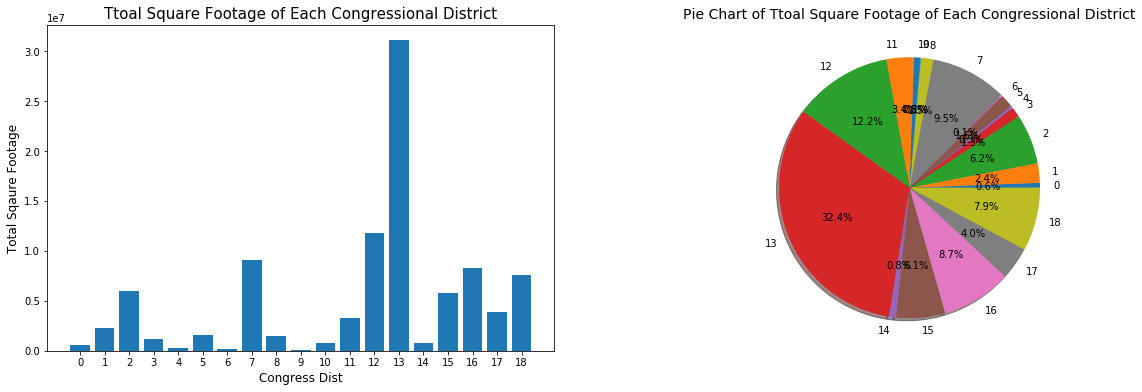

In [11]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

ax[0].bar(sum_sf_congress.index, sum_sf_congress.values, linewidth=4)
ax[0].set_xlabel('Congress Dist', fontsize=12)
ax[0].set_xticks(np.arange(0,19))
ax[0].set_ylabel('Total Sqaure Footage', fontsize=12)
ax[0].set_title('Ttoal Square Footage of Each Congressional District', fontsize=15)

ax[1].pie(sum_sf_congress.values,labels=sum_sf_congress.index, autopct='%1.1f%%',shadow=True )
ax[1].set_title('Pie Chart of Ttoal Square Footage of Each Congressional District', fontsize=14)

plt.show()

* **Success**   
    1. The left histogram allows us to compare the total area of buildings in every congressional district. As we can see, Congress Dist 7 has the largest area, much higher than others.
    2. The pie chart on the right is powerful and intuitive for showing the percentage each part takes up.   


* **Shortcomings**  
    1. The left one could be more clear and precise if accurate number is added above each bar. 
    2. There are many congressional districts that takes less than 10%, which makes the pie chart hard to see.

## Q3.  Average square footage per floor as a function of congressional district

In [12]:
# drop rows with 0 floor
buildings_floor = buildings_sf[(buildings_sf['Total Floors'].isna()==False)] 

# calculate the square footage per floor 
sf_per_floor = buildings_floor['Square Footage']/buildings_floor['Total Floors']
buildings_floor = buildings_floor.assign(sf_per_floor = sf_per_floor)

# group by Congress Dist
mean_sf_per_floor = buildings_floor.groupby('Congress Dist')['sf_per_floor'].mean()

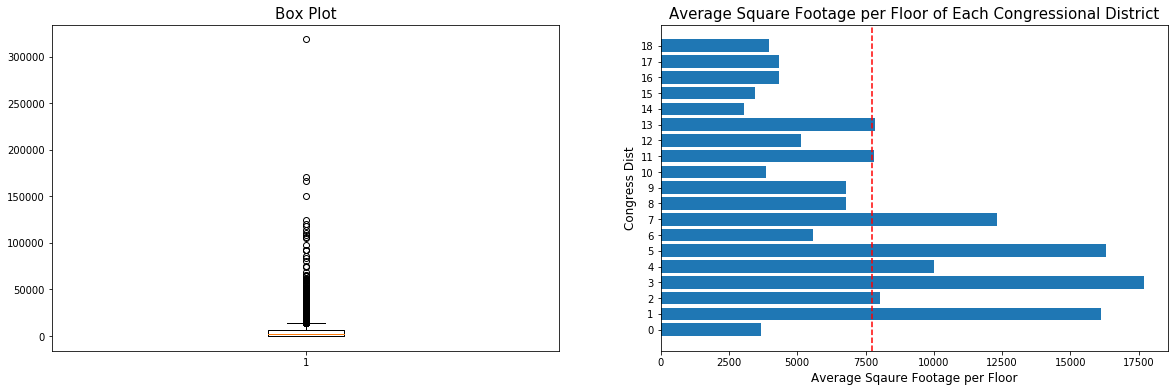

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

ax[0].boxplot(sf_per_floor)
ax[0].set_title('Box Plot', fontsize=15)

ax[1].axvline(mean_sf_per_floor.mean(), ls='--', color='r')
ax[1].barh(mean_sf_per_floor.index, mean_sf_per_floor.values)
ax[1].set_ylabel('Congress Dist',fontsize=12)
ax[1].set_yticks(np.arange(0,19))
ax[1].set_xlabel('Average Sqaure Footage per Floor',fontsize=12)
ax[1].set_title('Average Square Footage per Floor of Each Congressional District', fontsize=15)

plt.show()

* **Success**  
    1. Box plot could be a powerful tool to find outliers(too large or too small), and how to deal with outliers could have an impact on our visualization figures. 
    2. The horizontal histogram is intuitive, and as the red average line indicates, there are four congrssional districts that are much higher than the average level, but for those below, the distribution is more even.  
    
  
* **Shortcomings**  
    1. The box plot may look confusing at first and is not self-explanatory. 
    2. From the box plot, there are values that are too large. Because no threshold is pre-determined, we cannot determine whether they are outliers so cannot conduct further processing. 
    3. The histogram plot on the right could be precise if accurate number is added above each bar.

## (Optional) Q4. Square footage for the five most common departments as a function of year.

In [14]:
# get SquareFootage and YearAcquired columns grouped by Agency Name
buildings_agency = buildings_sf[['Agency Name','Square Footage','Year Acquired']].groupby(['Agency Name'])
buildings_agency.head()

,Agency Name,Square Footage,Year Acquired
2796,Historic Preservation Agency,1200.0,1753.0
2805,Historic Preservation Agency,3594.0,1802.0
2808,Historic Preservation Agency,846.0,1802.0
2809,Historic Preservation Agency,216.0,1810.0
2492,Historic Preservation Agency,3432.0,1810.0
2337,Southern Illinois University,120000.0,1832.0
2481,Department of Natural Resources,760.0,1840.0
3107,Department of Natural Resources,3256.0,1841.0
8213,Department of Human Services,57978.0,1845.0
2108,Department of Natural Resources,1644.0,1848.0


In [20]:
# or use most_common method
# count the occurance of each Agency and display by order
buildings_agency_count = buildings_agency.agg(['count']).sort_values(by=('Square Footage','count'), ascending=False)
# pick the top 5 most common agencies
top_5_agency = buildings_agency_count[0:5].index
top_5_agency.values

array(['Department of Natural Resources', 'Department of Corrections',
       'Department of Transportation', 'University of Illinois',
       'Department of Human Services'], dtype=object)

In [34]:
top_5_df = buildings_sf[buildings_sf["Agency Name"].isin(top_5_agency.values)][['Agency Name','Year Acquired','Square Footage']]
top_5_df.set_index('Agency Name')
top_5_df.head()

,Agency Name,Year Acquired,Square Footage
2481,Department of Natural Resources,1840.0,760.0
3107,Department of Natural Resources,1841.0,3256.0
8213,Department of Human Services,1845.0,57978.0
2108,Department of Natural Resources,1848.0,1644.0
1105,University of Illinois,1857.0,3000.0


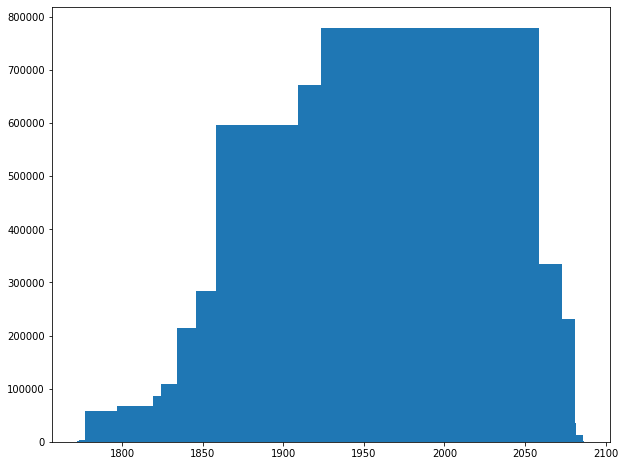

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(top_5_df.Year Acquired,top_5_df.Square Footage)
plt.show()